**Projet Data science**



## **Contexte**

Nous sommes quatre amis, Malika, Octave, Emma et Enzia et nous avons décidé d'ouvrir une agence immobilière. Nous nous sommes fortement développé sur ce marché au cours des dernières années. Nous détenons donc aujourd'hui des contrats pour des centaines de biens. Animés par la volonté de rester compétitifs sur le marché immobilier, nous avons pris la décision stratégique d'optimiser nos ventes. Pour ce faire, nous souhaiterions déterminer le prix des logements en fonction de leurs caractéristiques et segmenter les logements en différentes catégories. L'objectif de cette démarche est d'améliorer notre positionnement sur le marché, de maximiser nos bénéfices et également d'améliorer la satisfaction client.

**Import et nettoyage de la base**

Dans un premier temps, nous importons la base de donnée "HousePrices". On indique bien que l'index est la première colonne. Nous n'avons pas besoin de spécifier le délimiteur car par défaut, c'est le point virgule.

In [ ]:
# Importation de la base de données et lecture
import pandas as pd
df = pd.read_csv("HousePrices.csv",index_col=0)

Après avoir importé la base de données, nous commençons par regarder comment celle-ci est structurée afin de voir s'il y a des modifications à faire.

In [ ]:
# Affichage des informations relatives au df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 1 to 546
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       546 non-null    float64
 1   lotsize     546 non-null    int64  
 2   bedrooms    546 non-null    int64  
 3   bathrooms   546 non-null    int64  
 4   stories     546 non-null    int64  
 5   driveway    546 non-null    object 
 6   recreation  546 non-null    object 
 7   fullbase    546 non-null    object 
 8   gasheat     546 non-null    object 
 9   aircon      546 non-null    object 
 10  garage      546 non-null    int64  
 11  prefer      546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 55.5+ KB


Grâce à l'affichage des informations, nous pouvons voir que tous les types de variables sont bien renseignés. De plus, il n'y a pas de valeurs manquantes.

In [ ]:
# Affichage de la fin du df pour voir les données
df.tail()

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no
546,105000.0,6000,3,1,2,yes,no,no,no,yes,1,no


Nous remarquons que la variable "lotsize" affiche des valeurs élevées. Après vérification dans le fichier annexe, il s'agit de pieds carrés. Afin d'assurer une meilleure lisibilité et une meilleure compréhension de ces valeurs, nous allons transformer la variable pour obtenir des mètres carrés.
Nous créons une copie du dataframe pour ne pas tout réexécuter à chaque fois.

In [ ]:
df2 = df.copy()

# Conversion des pieds carrés en m2
df2['lotsize'] = df2['lotsize'] * (1/ 10.764)
df2.head(10)

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
1,42000.0,543.478261,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,371.609067,2,1,1,yes,no,no,no,no,0,no
3,49500.0,284.280936,3,1,1,yes,no,no,no,no,0,no
4,60500.0,617.800074,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,590.858417,2,1,1,yes,no,no,no,no,0,no
6,66000.0,386.473430,3,1,1,yes,yes,yes,no,yes,0,no
7,66000.0,360.460795,3,2,2,yes,no,yes,no,no,2,no
8,69000.0,386.473430,3,1,3,yes,no,no,no,no,0,no
9,83800.0,445.930881,3,1,1,yes,yes,yes,no,no,0,no
10,88500.0,510.962467,3,2,4,yes,yes,no,no,yes,1,no


Nous voyons que la modification a bien été réalisée. Maintenant que nous avons nettoyé et clarifié notre base de données, nous sommes prêts à commencer à répondre à nos questions de recherche.


## **Question 1 : Déterminer le prix des maisons selon leurs caractéristiques**

**1.Regression linéaire**

Pour déterminer le prix des maisons en fonction de leurs caractéristiques, nous allons utiliser une regression linéaire multiple. Nous utilisons cet algorithme car nous souhaiterions ici évaluer la corrélation entre plusieurs variables indépendantes, qui sont les caractéristiques des maisons, et une variable dépendante, qui est le prix des maisons.

**Recode du yes/no en 1/0**

Pour faire une regression linéaire multiple, il est nécéssaire que toutes nos variables soient numériques. Nous commençons donc par transformer nos variables de type "object" codées en 'yes/no' en 1/0. Utiliser toutes les variables (features) peut aider à améliorer la qualité du modèle.


In [ ]:
# Colonnes à transformer en 1/0
columns_to_1_0 = ['driveway', 'recreation', 'fullbase', 'gasheat', 'aircon', 'prefer']

for column in columns_to_1_0:
 df2[column] = df2[column].map({"yes": 1, "no": 0})

df2.head()

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
1,42000.0,543.478261,3,1,2,1,0,1,0,0,1,0
2,38500.0,371.609067,2,1,1,1,0,0,0,0,0,0
3,49500.0,284.280936,3,1,1,1,0,0,0,0,0,0
4,60500.0,617.800074,3,1,2,1,1,0,0,0,0,0
5,61000.0,590.858417,2,1,1,1,0,0,0,0,0,0


Les variables codées en 'yes/no' sont correctement transformées en 1/0.

**Normalisation des données**

Nous décidons ensuite de faire une normalisation pour éviter des ordres de grandeur différents entre le prix et les autres caractéristiques. Si notre modèle fonctionne, nous avons conscience que la normalisation des données rendra plus difficile l'interprétation des résultats étant donné que les données d'origine ont été modifiées.

In [ ]:
from sklearn.preprocessing import StandardScaler

# On normalise toutes les caractéristiques qui déterminent le prix de la maison
selected_columns = df2.columns
scaler = StandardScaler()
X = scaler.fit_transform(df2)

# Création d'un Dataframe normalisé
df_n = df2.copy()
df_n[selected_columns] = X

df_n.describe()



,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
count,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,5.460000e+02,546.000000,5.460000e+02,5.460000e+02
mean,-2.342449e-16,5.205441e-17,-1.431496e-16,-1.366428e-16,-3.904081e-17,1.301360e-16,1.301360e-17,3.578741e-17,2.602721e-17,0.000000,3.904081e-17,1.041088e-16
std,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917e+00,1.000917,1.000917e+00,1.000917e+00
min,-1.616360e+00,-1.615876e+00,-2.667529e+00,-5.694948e-01,-9.311572e-01,-2.467977e+00,-4.647963e-01,-7.335040e-01,-2.190540e-01,-0.681034,-8.045249e-01,-5.533716e-01
25%,-7.120642e-01,-7.156705e-01,-1.310147e+00,-5.694948e-01,-9.311572e-01,4.051902e-01,-4.647963e-01,-7.335040e-01,-2.190540e-01,-0.681034,-8.045249e-01,-5.533716e-01
50%,-2.294606e-01,-2.540267e-01,4.723490e-02,-5.694948e-01,2.217041e-01,4.051902e-01,-4.647963e-01,-7.335040e-01,-2.190540e-01,-0.681034,-8.045249e-01,-5.533716e-01
75%,5.202150e-01,5.584664e-01,4.723490e-02,1.423737e+00,2.217041e-01,4.051902e-01,-4.647963e-01,1.363319e+00,-2.190540e-01,1.468356,3.575666e-01,-5.533716e-01
max,4.568463e+00,5.101041e+00,4.119380e+00,5.410201e+00,2.527427e+00,4.051902e-01,2.151480e+00,1.363319e+00,4.565085e+00,1.468356,2.681750e+00,1.807104e+00


Nous voyons que les données sont normalisées correctement. La moyenne du prix normalisé est proche de 0. Cette valeur nous servira par la suite pour interprétrer la qualité du modèle.


**Entrainement du modèle**

Nous allons maintenant procéder à la séparation de notre base en deux fractions. Nous utilisons df_train pour entrainer notre modèle et df_test pour valider notre modèle.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# On prend 1/3 de la base pour le df_test, la graine d'aléatoire étant fixé sur 42
df_train, df_test = train_test_split(df_n, test_size=0.33,
random_state=42)

# Séparation de la target et des features
y_train = df_train[[ 'price' ]]
x_train = df_train.drop(['price'], axis='columns')
y_test = df_test[[ 'price' ]]
x_test = df_test.drop(['price'], axis='columns')

# Exécution de la régression linéaire
model_full = LinearRegression()
model_full.fit (x_train , y_train )

# Affiachage de l'intercept et des coefficients des features
print ( 'Intercept :', model_full.intercept_ )
liste_coeffs = model_full.coef_.ravel()
for i,coef in enumerate (liste_coeffs) :
 print (x_train.columns[i], ":", coef)


Intercept : [0.01538273]
lotsize : 0.29050474938037446
bedrooms : 0.04465113708932428
bathrooms : 0.20370434903198634
stories : 0.22365037358746637
driveway : 0.09284916176589333
recreation : 0.07343021340723316
fullbase : 0.14075362455588705
gasheat : 0.11595923802441085
aircon : 0.21423906200950527
garage : 0.17724829352611354
prefer : 0.11621374433808743


**Interprétation du modèle**

Avec les résultats obtenus dans "intercept", nous constatons que certaines caractéristiques ont un poids peu important par rapport aux autres. Par exemple,  "bathrooms" a un poids de 0,04, "recreation" de 0,07, ou encore "driveway" de 0,09, ce qui est très faible. Nous avons décidé d'élaguer le modèle en supprimant certaines caractéristiques. Cela va en effet nous permettre de simplifier notre modèle pour ne conserver que les variables qui ont une influence significative sur la prédiction du prix des maisons.

Nous avons choisi comme règle arbritaire d'enlever celles en dessous de 0,12, soit :

- bedrooms
- recreation
- driveway
- gasheat
- prefer

**Validation du modèle**

Pour évaluer la performance globale de notre modèle, nous estimons la MAE et la RMSE qui évaluent l'erreur moyenne entre les valeurs prédites par un modèle et les valeurs réelles. Pour que notre modèle soit considéré comme fiable, la RMSE et la MAE doivent être idéalement inférieures par rapport à notre variable dépendante (le prix réel moyen des maisons).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from math import sqrt

# Validation avec les features test
y_pred_full = model_full.predict ( x_test )

# Calcul des indicateurs
mae_full = mean_absolute_error ( y_test, y_pred_full )
mse_full = mean_squared_error ( y_test, y_pred_full )
rmse_full = sqrt(mse_full)
var_full = explained_variance_score( y_test, y_pred_full)

print(var_full)
print(rmse_full)
print(mae_full)

0.6783281145514777
0.6103226188399075
0.4554176513064143



La variance expliquée est d'environ 67% mais la RMSE de 0,61 et la MAE de 0,45. Ce sont des valeurs assez hautes par rapport au prix réel moyen qui est autour de 0. En conséquence, nous pensons que notre modèle pourrait être davantage performant.


In [ ]:
r2 = r2_score( y_test , y_pred_full )
print(r2)

0.676457834260737


Afin de vérifier ces résultats, nous utilisons le R2, qui confirme nos propos. En effet, la valeur reste quand même assez éloignée de 1, ce qui signifie que notre modèle peut  encore être amélioré. Nous allons donc maintenant enlever les variables citées plus haut et refaire la regression en espérant obtenir de meilleurs résultats.

**Regression linéaire 2**

In [ ]:
# Variables à utiliser pour la deuxième régression linéaire
selected_columns2 = df_n.columns.difference(['bedrooms', 'recreation', 'driveway', 'gasheat', 'prefer'])
df_n2 = df_n[selected_columns2]

# Nous gardons la même séparation de 1/3
df_train2, df_test2 = train_test_split(df_n2, test_size=0.33,
random_state=42)

# Séparation de la target et des features
y_train2 = df_train2[[ 'price' ]]
x_train2 = df_train2.drop(['price'], axis='columns')
y_test2 = df_test2[[ 'price' ]]
x_test2 = df_test2.drop(['price'], axis='columns')

# Exécution de la 2e régression linéaire
model_full = LinearRegression()
model_full.fit (x_train2 , y_train2)

# Affichage de notre intercept et des coefficients
print ( 'Intercept :', model_full.intercept_ )

liste_coeffs = model_full.coef_.ravel()
for i,coef in enumerate (liste_coeffs) :
 print (x_train.columns[i], ":", coef)

Intercept : [0.0233433]
lotsize : 0.19821494969886588
bedrooms : 0.2186832022189813
bathrooms : 0.21235957171212588
stories : 0.20379922110888807
driveway : 0.34660873973766004
recreation : 0.2652239012550659


**Validation du modèle**

In [ ]:
# Nous demandons à calculer et afficher nos coefficients
y_pred_full2 = model_full.predict (x_test2)
mae_full = mean_absolute_error ( y_test2, y_pred_full2 )
mse_full = mean_squared_error ( y_test2, y_pred_full2 )
rmse_full = sqrt(mse_full)
var_full = explained_variance_score( y_test2, y_pred_full2)
r2 = r2_score( y_test2 , y_pred_full2)
print(rmse_full)
print(mae_full)
print(r2)

0.6520707007386245
0.4785421067174204
0.6306812723118972


**Interprétation du modèle**

Malgré nos modifications, nous constatons que notre précision ne s'est pas amélioriée. Elle a même un peu diminué puisque RMSE v2 = 0,65 > 0,61 et MAE v2 = 0,47 > 0,45. De plus, la R2 tend désormais davantage vers 0 que 1.

Nous en concluons qu'il est  préférable d'utiliser la régression linéaire avec toutes les variables. Par ailleurs, comme les résultats obtenus ne sont pas concluants, nous avons décidé de ne pas rentrer dans le détail de leur interprétation, notamment en mentionnant l'évolution du prix selon les caractéristiques des logements. Néanmoins, si nous l'avions fait, nous avons conscience que nous aurions d'abord dû remettre les résultats à l'échelle car nous avons intégré la normalisation à notre modèle.

Comme nous souhaitons obtenir de bons résultats, nous avons décidé d'utiliser un arbre de regression afin de voir si cela fonctionne mieux.

**2.Arbre de régression**

L'arbre de régression est une autre méthode qui permet de déterminer le prix de la maison en fonction de ses caractéristiques. C'est une autre approche de regression qui pourrait peut-être mieux s'appliquer aux données de notre dataset.
Comme nous avons vu précédémment que le fait de retirer certaines variables n'apportait pas de résultats concluants, nous décidons d'utiliser toutes les caractéristiques de la base de données.

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_text

# Modèle de l'arbre de régression
model_tree = DecisionTreeRegressor(random_state=42)

# Pas besoin de recréer les df_train et df_test
model_tree.fit(x_train, y_train)

# Affichage intercept et des coefficients
liste_coeffs = model_tree.feature_importances_
for i, importance in enumerate(liste_coeffs):
    print(x_train.columns[i], ":", importance)


lotsize : 0.4768477932281222
bedrooms : 0.040776855505176055
bathrooms : 0.10154698251344418
stories : 0.052186564552338666
driveway : 0.02119818758058679
recreation : 0.030221387952780645
fullbase : 0.05326643485175739
gasheat : 0.022624126701011795
aircon : 0.03980935144091017
garage : 0.11909056235929827
prefer : 0.042431753314573925


**Validation de l'arbre de régression**

In [ ]:
# Validation avec les données test
y_pred_tree = model_tree.predict(x_test)

# Calcul des indicateurs de performance
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = sqrt(mse_tree)
r2 = r2_score( y_test , y_pred_tree )

print("ma rmse est :",rmse_tree)
print("ma mae est :",mae_tree)
print("mon R2 est ", r2)

ma rmse est : 0.9427748263190326
ma mae est : 0.6549648360458225
mon R2 est  0.2279811353382032


Grâce aux résultats obtenus, nous constatons que l'arbre de régression est encore moins performant : le MAE et le RMSE ont une erreur de précision plus élevée.
De plus, nous observons que le R2 a fortement diminué en passant de 0,67 à 0,22. Nous retenons donc la régression linéaire comme modèle le plus performant.

**Conclusion**

Nous avons pu voir à travers cette première partie que pour déterminer le prix d'une maison en fonction de ses caractéristiques, retenir la regression linéaire en prenant en considération toutes les variables est la meilleure solution. Cependant, cette option ne semble pas être la plus pertinente  pour notre agence immobilière. En effet, le modèle n'étant pas très fiable, il est impossible de nous baser sur des estimations avec de grandes erreurs de précision.

En réalité, la relation entre le prix et les caractéristiques est bien plus complexe qu'une simple régression linéaire.

Nous allons donc tenter de résoudre notre seconde question.


## **Question 2 : Segmentation des logements en plusieurs catégories**




**1.K-Means**

Pour la segmentation, nous utilisons le K-Means qui est un algorithme à apprentissage non supervisé. Nous lui fournissons des données qu'il regroupe en plusieurs clusters (groupes).

**Identification du nombre de clusters**

Avant toute chose, nous allons identifier le nombre de clusters idéal pour faire notre segmentation. Des représentations graphiques de l'inertie et de la silhouette vont nous permettre de déterminer ce nombre.

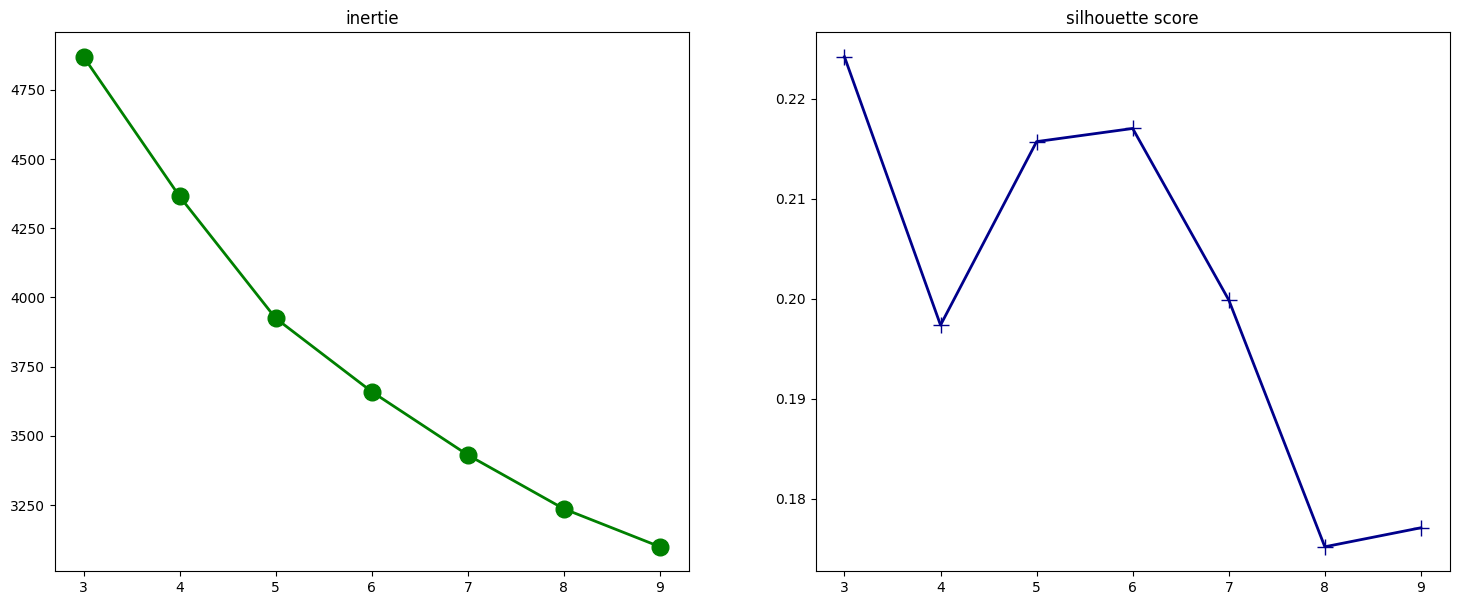

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Afficher le graphique
%matplotlib inline

# Initialisation de la boucle for
n_clusters = [3, 4, 5, 6, 7, 8, 9]
inerties = []
silhouettes = []

# Boucle for pour calculer l'inertie et la silhouette
for k in n_clusters:
    km = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=7)
    km.fit(df_n)
    scoef = silhouette_score(df_n, km.labels_)
    inerties.append(km.inertia_)
    silhouettes.append(scoef)

# Représentation graphique de l'inertie et de la silhouette
fig, axs = plt.subplots(1,2, figsize=(18,7) )
axs[0].set_title('inertie')
axs[0].plot(n_clusters,inerties, marker='o', color='green',
 linewidth=2, markersize=12)
axs[1].set_title('silhouette score')
axs[1].plot(n_clusters,silhouettes, marker='+',
 color='darkblue'
,
 linewidth=2, markersize=12)


**Interprétation**

Nous remarquons que l'inertie semble décroitre à partir de 5 : nous voyons que son accélération diminue, même si cela n'est pas flagrant. De plus, dans la silhouette score, le nombre le plus haut est 6 mais ce nombre ne se démarque pas des autres de manière frappante. En conclusion, ces graphiques nous démontrent que le K-Means n'est pas le plus pertinent pour regrouper les caractéristiques en différents groupes.




**2.Classifcation ascendante hiérarchique (CAH)**

Pour aller plus loin, nous décidons de chercher une autre solution afin de faire une segmentation. Nous utilisons la CAH qui pourrait être plus performante pour notre dataset.

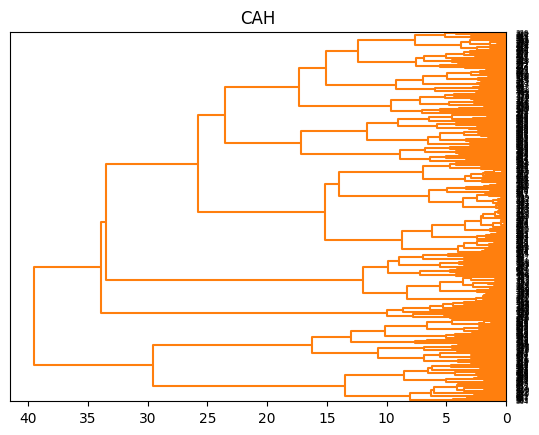

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

# Création d'un modèle CAH
Z = linkage(df_n,method='ward',metric='euclidean')

# Représentation graphique
plt.title("CAH")
dendrogram(Z,labels=df_n.index,orientation='left',color_threshold=300)
plt.show()

In [ ]:
# Avec le graphique, on retient t=27
groupes_cah = fcluster(Z,t=27,criterion='distance')
set(groupes_cah)

{1, 2, 3, 4, 5}

Il y a 5 groupes différents qui sont identifiés.

In [ ]:
# Analyse par label
df_n['labels'] = groupes_cah
df_n.groupby('labels').describe().transpose()

labels                1          2          3          4           5
price  count  57.000000  65.000000  25.000000  72.000000  327.000000
       mean    0.165138   1.697432   0.423807  -0.741013   -0.235438
       std     0.524953   0.970163   1.139083   0.467734    0.727775
       min    -1.241523  -0.079525  -1.353974  -1.616360   -1.616360
       25%    -0.120758   1.007504  -0.529331  -1.021305   -0.718624
...                 ...        ...        ...        ...         ...
prefer min    -0.553372  -0.553372  -0.553372  -0.553372   -0.553372
       25%    -0.553372  -0.553372  -0.553372  -0.553372   -0.553372
       50%     1.807104  -0.553372  -0.553372  -0.553372   -0.553372
       75%     1.807104   1.807104  -0.553372  -0.553372   -0.553372
       max     1.807104   1.807104   1.807104   1.807104    1.807104

[96 rows x 5 columns]

**Interprétation**

En regardant les moyennes des variables pour chaque groupe, nous avons pu définir une segmentation assez précise de nos biens.

*Groupe 1 : Maisons familles nombreuses*

Dans ce groupe, il est important d'avoir une "recreation" room pour que les enfants puissent s'amuser. De plus, généralement, la maison est située dans la "fullbase". Il est également indispensable que  la maison se trouve dans un quartier "prefer" pour que les enfants puissent grandir en toute sécurité.

*Groupe 2 : Les villas*

Ici, nous retrouvons les villas qui ont un prix élevé, mais également une surface très étendue en termes de m2. Nous relevons que l'élément central et indispensable est d'avoir un "aircon".

*Groupe 3 : Maisons milieu de gamme*

Nous avons ensuite les maisons milieu de gamme qui restent tout de même assez haut de gamme, mais dont les prix sont inférieurs à ceux des villas. Bien souvent, elles utilisent du "gasheat".

*Groupe 4 : Maisons bas de gamme*

L'avant-dernière catégorie est celle des maisons pour les personnes avec des revenus modestes. Le fait que ces maisons soient situées loin de l'autoroute réduit encore plus leur prix.

*Groupe 5 : Maisons intermédiaires*

Enfin, nous avons la catégorie des maisons intermédiaires, qui sont des maisons avec des prix ocsillants entre le milieu de gamme et le bas de gamme.




Nous constatons donc qu'entre les deux méthodes, la CAH est un bon moyen de segmenter les logements en plusieurs catégories. Celle-ci permet de créer différentes catégories pertinentes, en les séparant selon différentes caractéristiques.

 **Conclusion**

Notre première question de recherche, qui avait comme objectif principal d'établir des prix plus précis et compétitifs, dans un but d'amélioration de la satisfaction client n'a pas pu aboutir. En effet, nous n'avons pas pu estimer le prix de nos biens de manière suffisamment précise et fiable avec la regression linéaire et l'arbre de régression.

En revanche, notre deuxième question de recherche, qui a notamment pu être résolue grâce à la CAH, nous a permis de proposer une segmentation intéressante de nos biens en 5 différentes catégories. En pratique, il sera par exemple possible d'intégrer ces différentes catégories de maisons au menu déroulant s'intitulant "type de bien" sur notre site Internet.  Il sera également possible, lors d'une recherche, de filtrer les maisons selon ces différentes catégories. Ces catégories pourront également aider les conseillers en agence lors de rendez-vous à orienter plus facilement les clients vers des biens. Globalement, nous pourrons donc personnaliser davantage l'expérience client, en leur proposant selon leurs profils, des biens qui leur correspondent au mieux. L'adoption de cet algorithme permettra d'améliorer la satisfaction globale de notre clientèle et à notre agence d'être plus habile, performante, d'avoir une meilleure compréhension de l'offre immobilière, et ainsi d'assurer davantage de ventes.